In [1]:
import pandas as pd

df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [2]:
from scipy.stats import ttest_ind

complete = df[df['test preparation course'] == 'completed']['math score']
none = df[df['test preparation course'] == 'none']['math score']

t_stat, p_val = ttest_ind(complete, none, equal_var=False)  # Welch's t-test
print(f"t-statistic: {t_stat:.4f}, p-value: {p_val:.4f}")


t-statistic: 5.7870, p-value: 0.0000


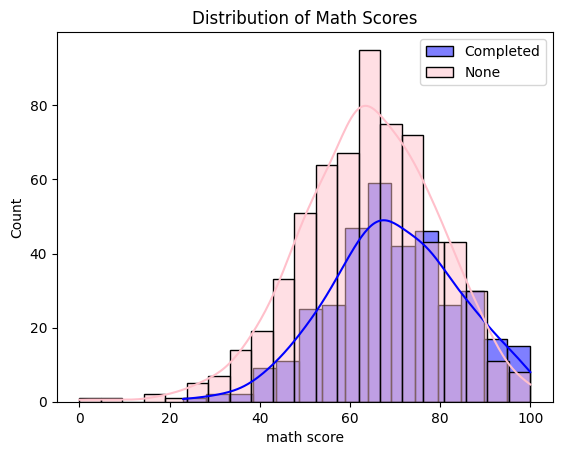

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(complete, kde=True, color='blue', label='Completed')
sns.histplot(none, kde=True, color='pink', label='None')
plt.legend()
plt.title("Distribution of Math Scores")
plt.show()


In [4]:
# Reading
t_stat_reading, p_val_reading = ttest_ind(
    df[df['test preparation course'] == 'completed']['reading score'],
    df[df['test preparation course'] == 'none']['reading score'],
    equal_var=False)

# Writing
t_stat_writing, p_val_writing = ttest_ind(
    df[df['test preparation course'] == 'completed']['writing score'],
    df[df['test preparation course'] == 'none']['writing score'],
    equal_var=False)

print(f"Reading - t: {t_stat_reading:.4f}, p: {p_val_reading:.4f}")
print(f"Writing - t: {t_stat_writing:.4f}, p: {p_val_writing:.4f}")


Reading - t: 8.0041, p: 0.0000
Writing - t: 10.7525, p: 0.0000


In [5]:
correlation_matrix = df[['math score', 'reading score', 'writing score']].corr()
print(correlation_matrix)


               math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000


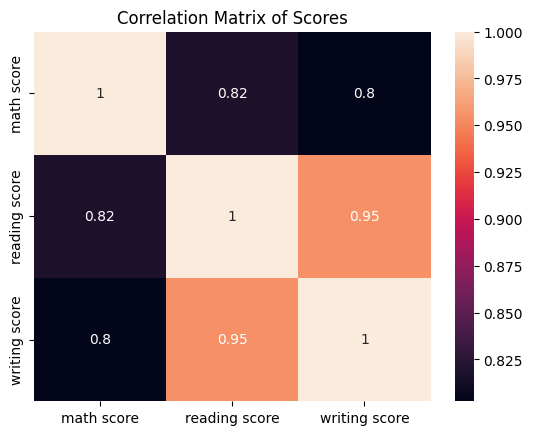

In [6]:
sns.heatmap(correlation_matrix, annot=True, cmap='rocket')
plt.title("Correlation Matrix of Scores")
plt.show()


In [7]:
import statsmodels.api as sm
df['test prep binary'] = df['test preparation course'].apply(lambda x: 1 if x == 'completed' else 0)

X = df[['reading score', 'test prep binary']]
y = df['math score']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             math score   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     1007.
Date:                Sun, 11 May 2025   Prob (F-statistic):          5.32e-240
Time:                        11:19:54   Log-Likelihood:                -3584.7
No. Observations:                1000   AIC:                             7175.
Df Residuals:                     997   BIC:                             7190.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                7.2292      1.343  

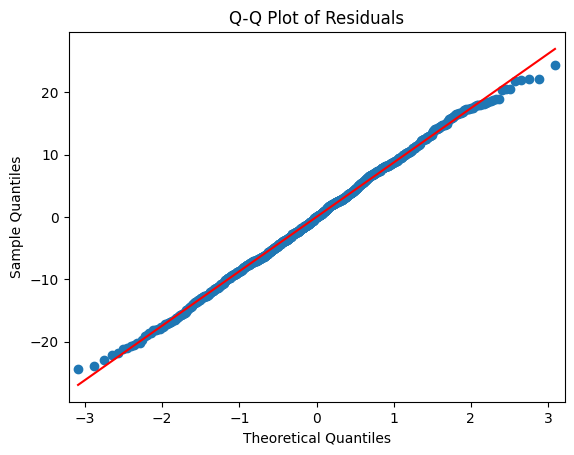

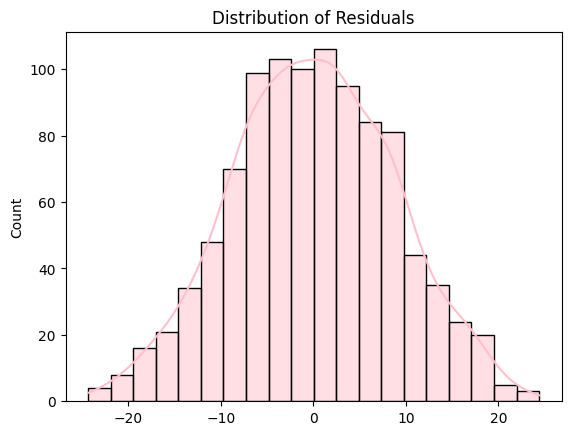

In [12]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

residuals = model.resid
sm.qqplot(residuals, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()

sns.histplot(residuals, kde=True, color='pink')
plt.title("Distribution of Residuals")
plt.show()
